In [1]:
from datasets import load_dataset
from transformers import AutoTokenizer, AutoModelForSequenceClassification, TrainingArguments, Trainer
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
from huggingface_hub import notebook_login
import torch
import pandas as pd
from transformers import pipeline
from sklearn.metrics import f1_score
import seaborn as sn
from matplotlib import pyplot as plt

In [2]:
notebook_login()

Login successful
Your token has been saved to C:\Users\researcher\.huggingface\token
Authenticated through git-credential store but this isn't the helper defined on your machine.
You might have to re-authenticate when pushing to the Hugging Face Hub. Run the following command in your terminal in case you want to set this credential helper as the default

git config --global credential.helper store


In [3]:
dataset = load_dataset("HFFErica/topicclassificaition", data_files={'train': 'train.csv', 'test': 'test.csv'})
dataset

Using custom data configuration HFFErica--topicclassificaition-3954eef609623f4a


Extracting data files:   0%|          | 0/2 [00:00<?, ?it/s]

0 tables [00:00, ? tables/s]

D:\Software\Anaconda3\envs\pytorch\lib\site-packages\datasets\download\streaming_download_manager.py:697: FutureWarning: the 'mangle_dupe_cols' keyword is deprecated and will be removed in a future version. Please take steps to stop the use of 'mangle_dupe_cols'
  return pd.read_csv(xopen(filepath_or_buffer, "rb", use_auth_token=use_auth_token), **kwargs)


0 tables [00:00, ? tables/s]

Dataset csv downloaded and prepared to C:/Users/researcher/.cache/huggingface/datasets/HFFErica___csv/HFFErica--topicclassificaition-3954eef609623f4a/0.0.0/652c3096f041ee27b04d2232d41f10547a8fecda3e284a79a0ec4053c916ef7a. Subsequent calls will reuse this data.


D:\Software\Anaconda3\envs\pytorch\lib\site-packages\datasets\download\streaming_download_manager.py:697: FutureWarning: the 'mangle_dupe_cols' keyword is deprecated and will be removed in a future version. Please take steps to stop the use of 'mangle_dupe_cols'
  return pd.read_csv(xopen(filepath_or_buffer, "rb", use_auth_token=use_auth_token), **kwargs)


  0%|          | 0/2 [00:00<?, ?it/s]

DatasetDict({
    train: Dataset({
        features: ['Order', 'text', 'final_topic', 'topics', 'label'],
        num_rows: 2220
    })
    test: Dataset({
        features: ['Order', 'text', 'final_topic', 'topics', 'label'],
        num_rows: 952
    })
})

In [4]:
train_dataset = dataset['train']
test_dataset = dataset['test']

In [5]:
tokenizer = AutoTokenizer.from_pretrained('facebook/bart-large-mnli')

In [6]:
num_labels = len(set(train_dataset['label']))
model = AutoModelForSequenceClassification.from_pretrained('facebook/bart-large-mnli', num_labels=num_labels, ignore_mismatched_sizes=True)

Some weights of BartForSequenceClassification were not initialized from the model checkpoint at facebook/bart-large-mnli and are newly initialized because the shapes did not match:
- classification_head.out_proj.weight: found shape torch.Size([3, 1024]) in the checkpoint and torch.Size([62, 1024]) in the model instantiated
- classification_head.out_proj.bias: found shape torch.Size([3]) in the checkpoint and torch.Size([62]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [7]:
pipe = pipeline("zero-shot-classification", model="facebook/bart-large-mnli")   

In [8]:
content = dataset['test'].to_pandas()
content

,Order,text,final_topic,topics,label
0,2,It is a universe filled with countless planets...,Engaging_1,Engaging,17
1,3,It's a fantastic game and I would recommend to...,Recommendation_5,Recommendation,48
2,4,Fighting on- and off planet is as exciting as ...,Combat mechanics_1,Combat mechanics,6
3,4,Everything is autopiloted- Feels more casual t...,Movement mechanics_4,Movement mechanics,34
4,6,Be patient and follow the storyline as,Narrative_4,Narrative,35
...,...,...,...,...,...
947,1792,when a shooting actually occurs in a dance cl...,ImmersionRealism_5,ImmersionRealism,25
948,1793,the same snarky humor and I can easily lose tr...,Engaging_5,Engaging,17
949,1794,this is an awesome remake.,GameEvaluation_5,GameEvaluation,21
950,1795,There's an ok amount of customization for the ...,Customisation_4,Customisation,12


In [9]:
text=content['text']
text

0      It is a universe filled with countless planets...
1      It's a fantastic game and I would recommend to...
2      Fighting on- and off planet is as exciting as ...
3      Everything is autopiloted- Feels more casual t...
4                 Be patient and follow the storyline as
                             ...                        
947     when a shooting actually occurs in a dance cl...
948    the same snarky humor and I can easily lose tr...
949                           this is an awesome remake.
950    There's an ok amount of customization for the ...
951    Unlocked a Steam achievement for the ground ve...
Name: text, Length: 952, dtype: object

In [12]:
labels = [
"InteractionSocialisation",
"GameEvaluation",
"BugsCrashing",
"VisualAtmosphere",
"DifficultyBalance",
"Comparison",
"GameProgression",
"Exploration",
"Engaging",
"Update",
"ImmersionRealism",
"Novelty",
"Controls",
"Narrative",
"Developer",
"Audio",
"Platforms",
"Learnability",
"Combat mechanics",
"Management mechanics",
"Recommendation",
"Playtime and Gameplay length",
"Creative mechanics",
"Customisation",
"PersonalInfluence",
"Emotion",
"Development states",
"Guide and Tutorials",
"UIandUX",
"PriceQuality ratio",
"Players modification and Workshops",
"OnlineVideo",
"Movement mechanics",
"Survival mechanics",
"Virtual reality headset",
"In-game economic mechanics",
"Order state",
"Content filter",
"Mode settings",
"Navigation and Maps",
"Graphics settings",
"Review reception",
"Server",
"Promotion strategy and Marketing collateral",
"In-game physics mechanics",
"Social identity",
"Returning player",
"Accessibility options",
"Camera control",
"Puzzle mechanics",
"Refund",
"Game awareness duration",
"Language settings and Localisation", 
"Simulation mechanics",
"Competition",
"Review experience",
"Launch",
"Wishlist and Notifications",
"Esports competition",
"Reward system",
"Ownership",
"Cheating"    
]

In [13]:
results = pipe(text.to_list(), labels, multi_class=True)

The `multi_class` argument has been deprecated and renamed to `multi_label`. `multi_class` will be removed in a future version of Transformers.


In [14]:
name=['labels','scores','sequence']
label_results=pd.DataFrame(columns=name,data=results)
print(label_results)
label_results.to_csv('zero-label_NF_results_1125.csv',encoding='utf-8', index=False)

                                                labels  \
0    [Returning player, Mode settings, Comparison, ...   
1    [Recommendation, Engaging, Review experience, ...   
2    [Engaging, Combat mechanics, Review experience...   
3    [UIandUX, VisualAtmosphere, Developer, Mode se...   
4    [Narrative, Recommendation, Game awareness dur...   
..                                                 ...   
947  [Engaging, Comparison, Mode settings, Immersio...   
948  [Playtime and Gameplay length, Returning playe...   
949  [Engaging, Update, Review reception, Review ex...   
950  [Returning player, Customisation, Review exper...   
951  [Returning player, PersonalInfluence, Comparis...   

                                                scores  \
0    [0.8049932718276978, 0.6970860958099365, 0.638...   
1    [0.9808417558670044, 0.936583936214447, 0.8671...   
2    [0.9913380146026611, 0.963236927986145, 0.8592...   
3    [0.8086773157119751, 0.7268641591072083, 0.698...   
4    [0.94658

In [15]:
content['zero_labels']=label_results['labels']
content

,Order,text,final_topic,topics,label,zero_labels
0,2,It is a universe filled with countless planets...,Engaging_1,Engaging,17,"[Returning player, Mode settings, Comparison, ..."
1,3,It's a fantastic game and I would recommend to...,Recommendation_5,Recommendation,48,"[Recommendation, Engaging, Review experience, ..."
2,4,Fighting on- and off planet is as exciting as ...,Combat mechanics_1,Combat mechanics,6,"[Engaging, Combat mechanics, Review experience..."
3,4,Everything is autopiloted- Feels more casual t...,Movement mechanics_4,Movement mechanics,34,"[UIandUX, VisualAtmosphere, Developer, Mode se..."
4,6,Be patient and follow the storyline as,Narrative_4,Narrative,35,"[Narrative, Recommendation, Game awareness dur..."
...,...,...,...,...,...,...
947,1792,when a shooting actually occurs in a dance cl...,ImmersionRealism_5,ImmersionRealism,25,"[Engaging, Comparison, Mode settings, Immersio..."
948,1793,the same snarky humor and I can easily lose tr...,Engaging_5,Engaging,17,"[Playtime and Gameplay length, Returning playe..."
949,1794,this is an awesome remake.,GameEvaluation_5,GameEvaluation,21,"[Engaging, Update, Review reception, Review ex..."
950,1795,There's an ok amount of customization for the ...,Customisation_4,Customisation,12,"[Returning player, Customisation, Review exper..."


In [16]:
content.to_csv('zero-label_NF_results_1125.csv',encoding='utf-8', index=False)

In [19]:
rawdata = pd.read_csv('zero-label_NF_results_1125.csv', encoding='utf-8')
rawdata

,Order,text,final_topic,topics,label,predicted_label
0,2,It is a universe filled with countless planets...,Engaging_1,Engaging,17,Returning player
1,3,It's a fantastic game and I would recommend to...,Recommendation_5,Recommendation,48,Recommendation
2,4,Fighting on- and off planet is as exciting as ...,Combat mechanics_1,Combat mechanics,6,Engaging
3,4,Everything is autopiloted- Feels more casual t...,Movement mechanics_4,Movement mechanics,34,UIandUX
4,6,Be patient and follow the storyline as,Narrative_4,Narrative,35,Narrative
...,...,...,...,...,...,...
947,1792,when a shooting actually occurs in a dance cl...,ImmersionRealism_5,ImmersionRealism,25,Engaging
948,1793,the same snarky humor and I can easily lose tr...,Engaging_5,Engaging,17,Playtime and Gameplay length
949,1794,this is an awesome remake.,GameEvaluation_5,GameEvaluation,21,Engaging
950,1795,There's an ok amount of customization for the ...,Customisation_4,Customisation,12,Returning player


In [20]:
rawdata[rawdata['topics'] != rawdata['predicted_label']]

,Order,text,final_topic,topics,label,predicted_label
0,2,It is a universe filled with countless planets...,Engaging_1,Engaging,17,Returning player
2,4,Fighting on- and off planet is as exciting as ...,Combat mechanics_1,Combat mechanics,6,Engaging
3,4,Everything is autopiloted- Feels more casual t...,Movement mechanics_4,Movement mechanics,34,UIandUX
5,7,I have quite the game with saving my progress...,BugsCrashing_1,BugsCrashing,3,Returning player
6,7,but after about 2 hours of enjoying 5th or 6th...,BugsCrashing_2,BugsCrashing,3,Mode settings
...,...,...,...,...,...,...
947,1792,when a shooting actually occurs in a dance cl...,ImmersionRealism_5,ImmersionRealism,25,Engaging
948,1793,the same snarky humor and I can easily lose tr...,Engaging_5,Engaging,17,Playtime and Gameplay length
949,1794,this is an awesome remake.,GameEvaluation_5,GameEvaluation,21,Engaging
950,1795,There's an ok amount of customization for the ...,Customisation_4,Customisation,12,Returning player


In [21]:
y_actu = rawdata['topics']
y_pred = rawdata['predicted_label']

In [22]:
df_confusion = pd.crosstab(y_actu, y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)
df_confusion

Predicted,Accessibility options,Audio,Camera control,Cheating,Combat mechanics,Comparison,Competition,Controls,Creative mechanics,Customisation,...,Reward system,Server,Simulation mechanics,Social identity,Survival mechanics,UIandUX,Update,Virtual reality headset,Wishlist and Notifications,All
Actual,,,,,,,,,,,,,,,,,,,,,
Accessibility options,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,6
Audio,0,9,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,24
BugsCrashing,0,0,0,0,0,3,0,1,0,0,...,0,3,0,0,0,0,0,0,0,48
Camera control,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
Cheating,0,0,0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Update,0,0,0,0,0,0,0,0,0,1,...,0,1,0,0,0,0,6,0,0,30
Virtual reality headset,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,7,0,9
VisualAtmosphere,0,0,1,0,0,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,51


In [23]:
df_confusion =df_confusion[:62]
df_confusion= df_confusion.drop('All', axis=1)
df_confusion

Predicted,Accessibility options,Audio,Camera control,Cheating,Combat mechanics,Comparison,Competition,Controls,Creative mechanics,Customisation,...,Review reception,Reward system,Server,Simulation mechanics,Social identity,Survival mechanics,UIandUX,Update,Virtual reality headset,Wishlist and Notifications
Actual,,,,,,,,,,,,,,,,,,,,,
Accessibility options,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
Audio,0,9,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
BugsCrashing,0,0,0,0,0,3,0,1,0,0,...,0,0,3,0,0,0,0,0,0,0
Camera control,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Cheating,0,0,0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
UIandUX,0,0,0,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
Update,0,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,6,0,0
Virtual reality headset,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,7,0


In [24]:
y_true = []
y_pred = []
for actual_class in df_confusion.index:
    for predicted_class in df_confusion.columns:
        count = df_confusion.loc[actual_class, predicted_class]
        y_true.extend([actual_class] * count)
        y_pred.extend([predicted_class] * count)

f1 = f1_score(y_true, y_pred, average='macro')
print("F1 Score (Macro):", f1)

F1 Score (Macro): 0.1912992121237066


In [25]:
f1 = f1_score(y_true, y_pred, average='micro')
print("F1 Score (Micro):", f1)

F1 Score (Micro): 0.15021008403361344


In [26]:
df_confusion.to_csv('zero_test_NF_predict_replaced_confusion_nontrained.csv')

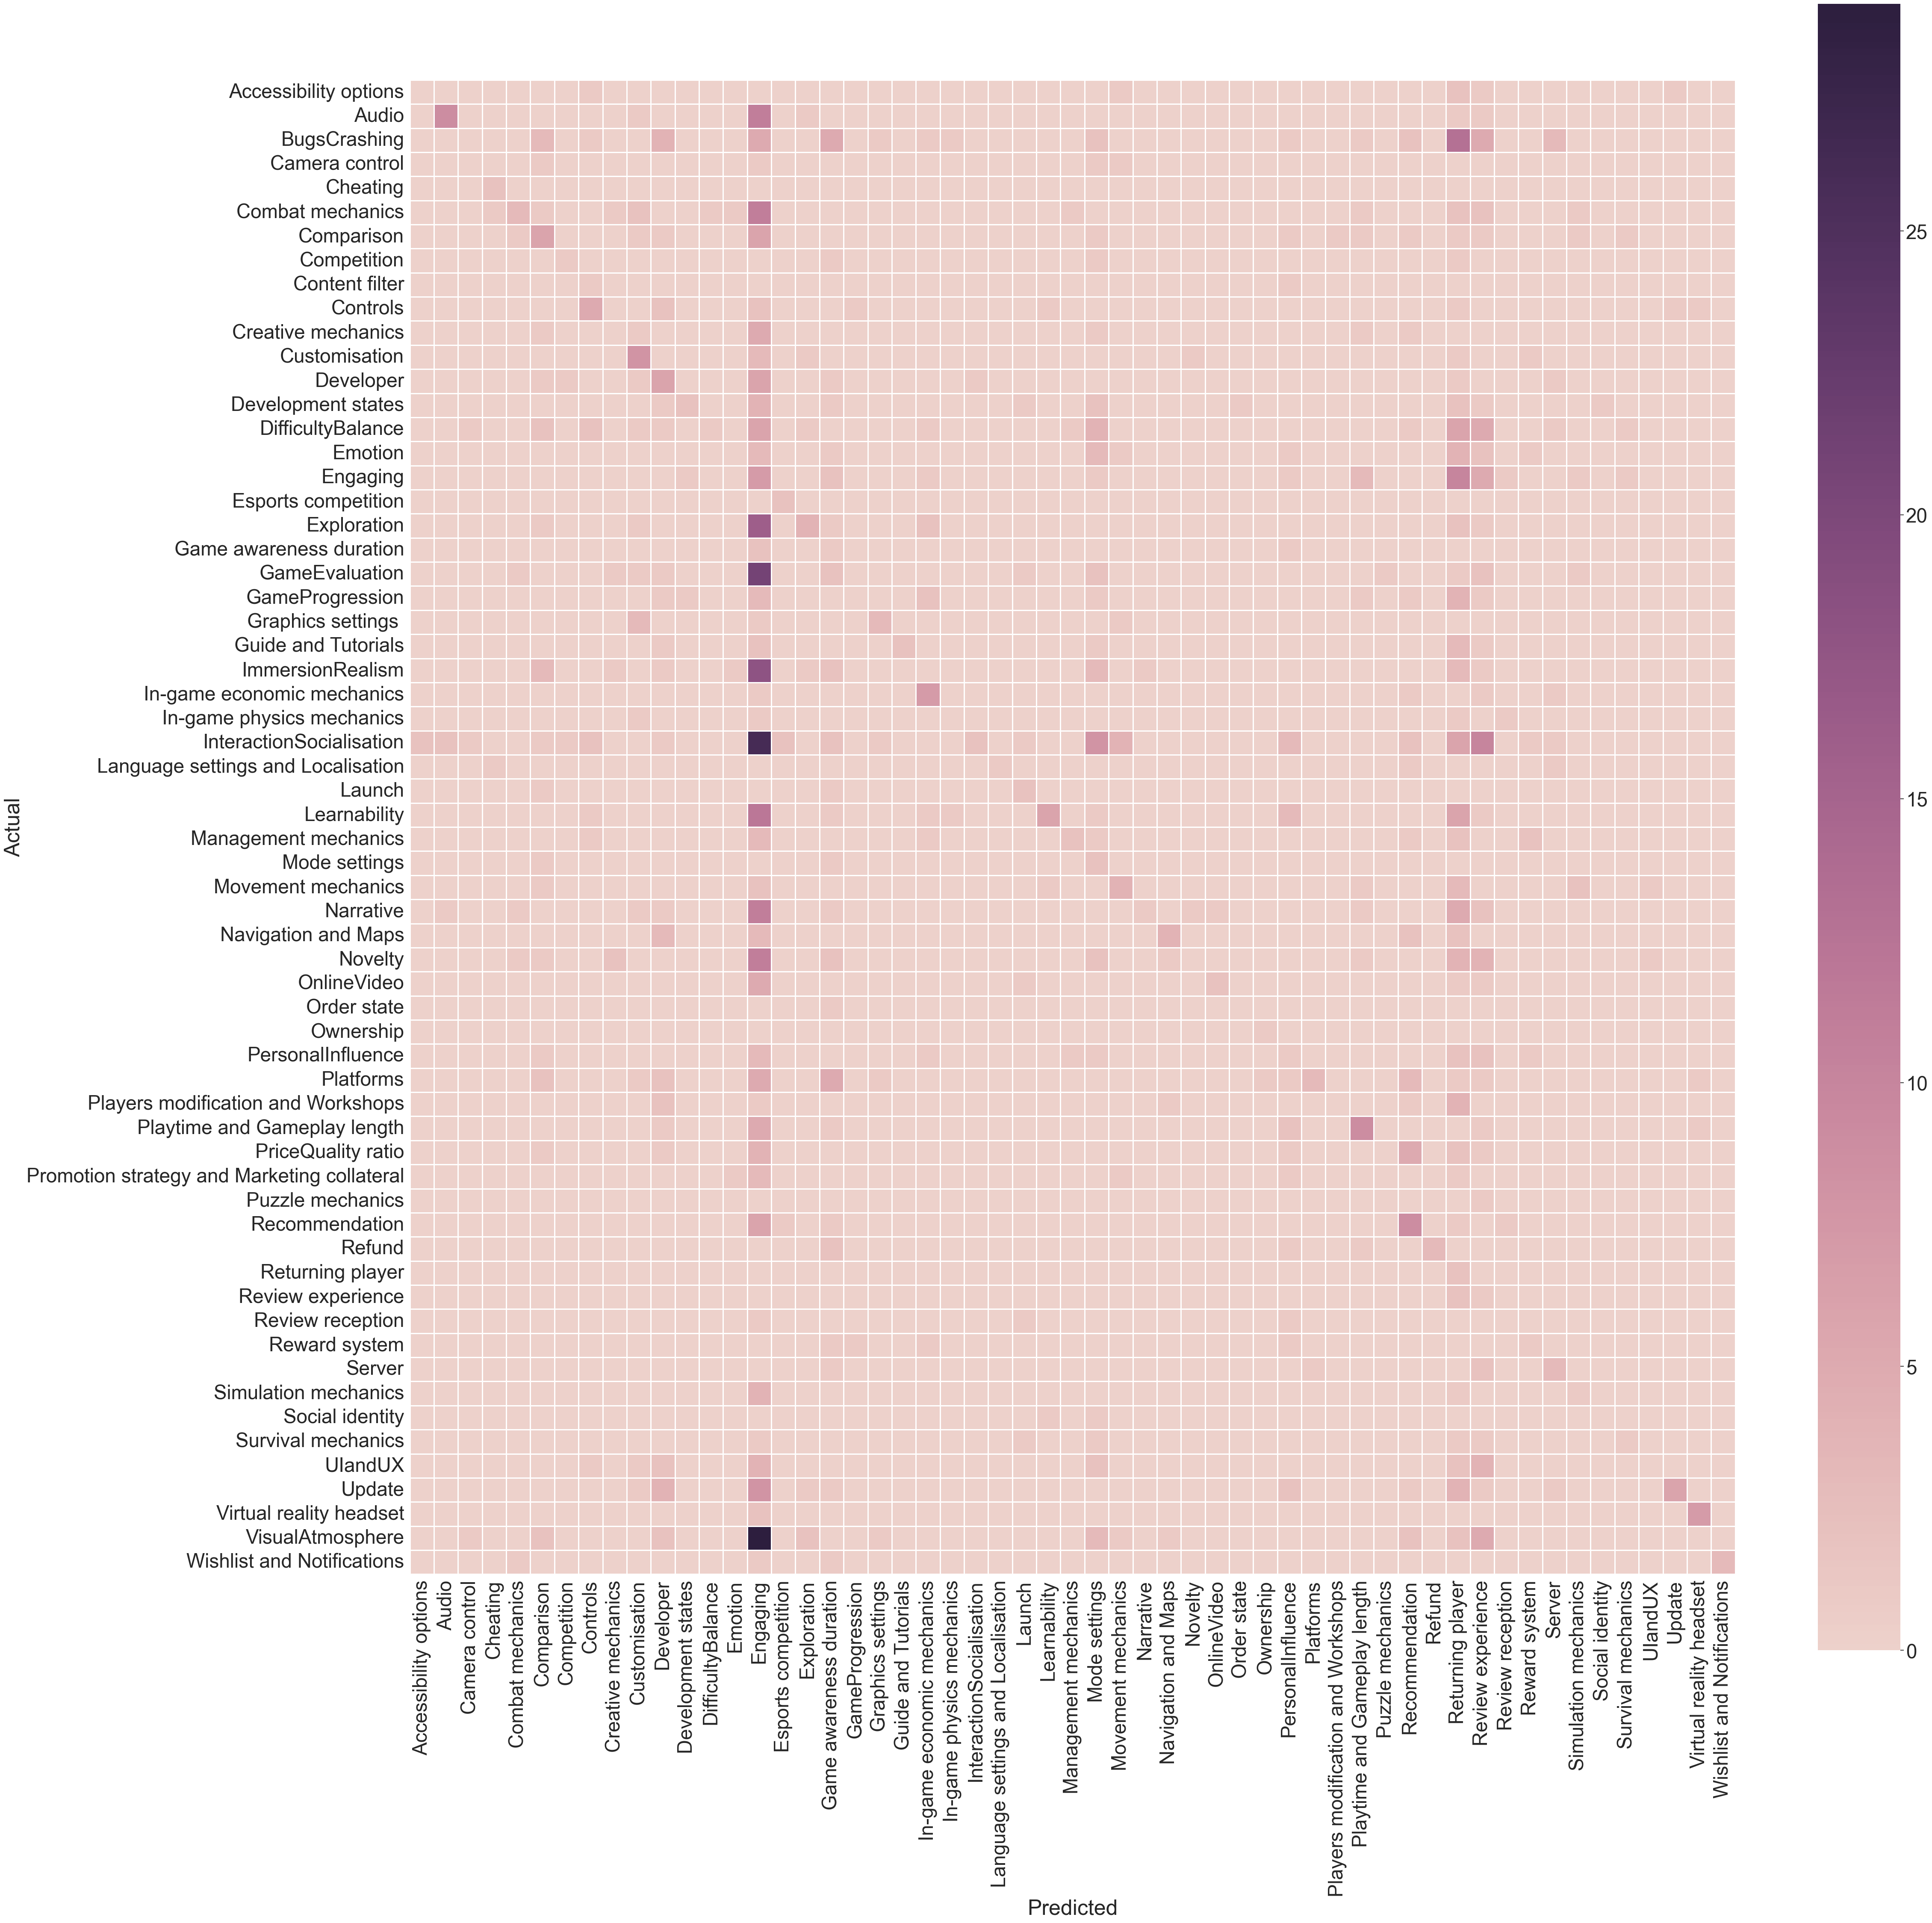

In [27]:
plt.figure(figsize = (50,50))

sn.set(font_scale=3) # for label size
sn.heatmap(df_confusion,  annot_kws={"size": 22}, cmap=sn.cubehelix_palette(as_cmap=True), fmt=".2f", square=True, linewidths=1, linecolor = "white")

plt.show()

In [28]:
from sklearn.preprocessing import minmax_scale
df_confusion[:] = minmax_scale(df_confusion)

C:\Users\researcher\AppData\Local\Temp\ipykernel_5300\1290073343.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_confusion[:] = minmax_scale(df_confusion)


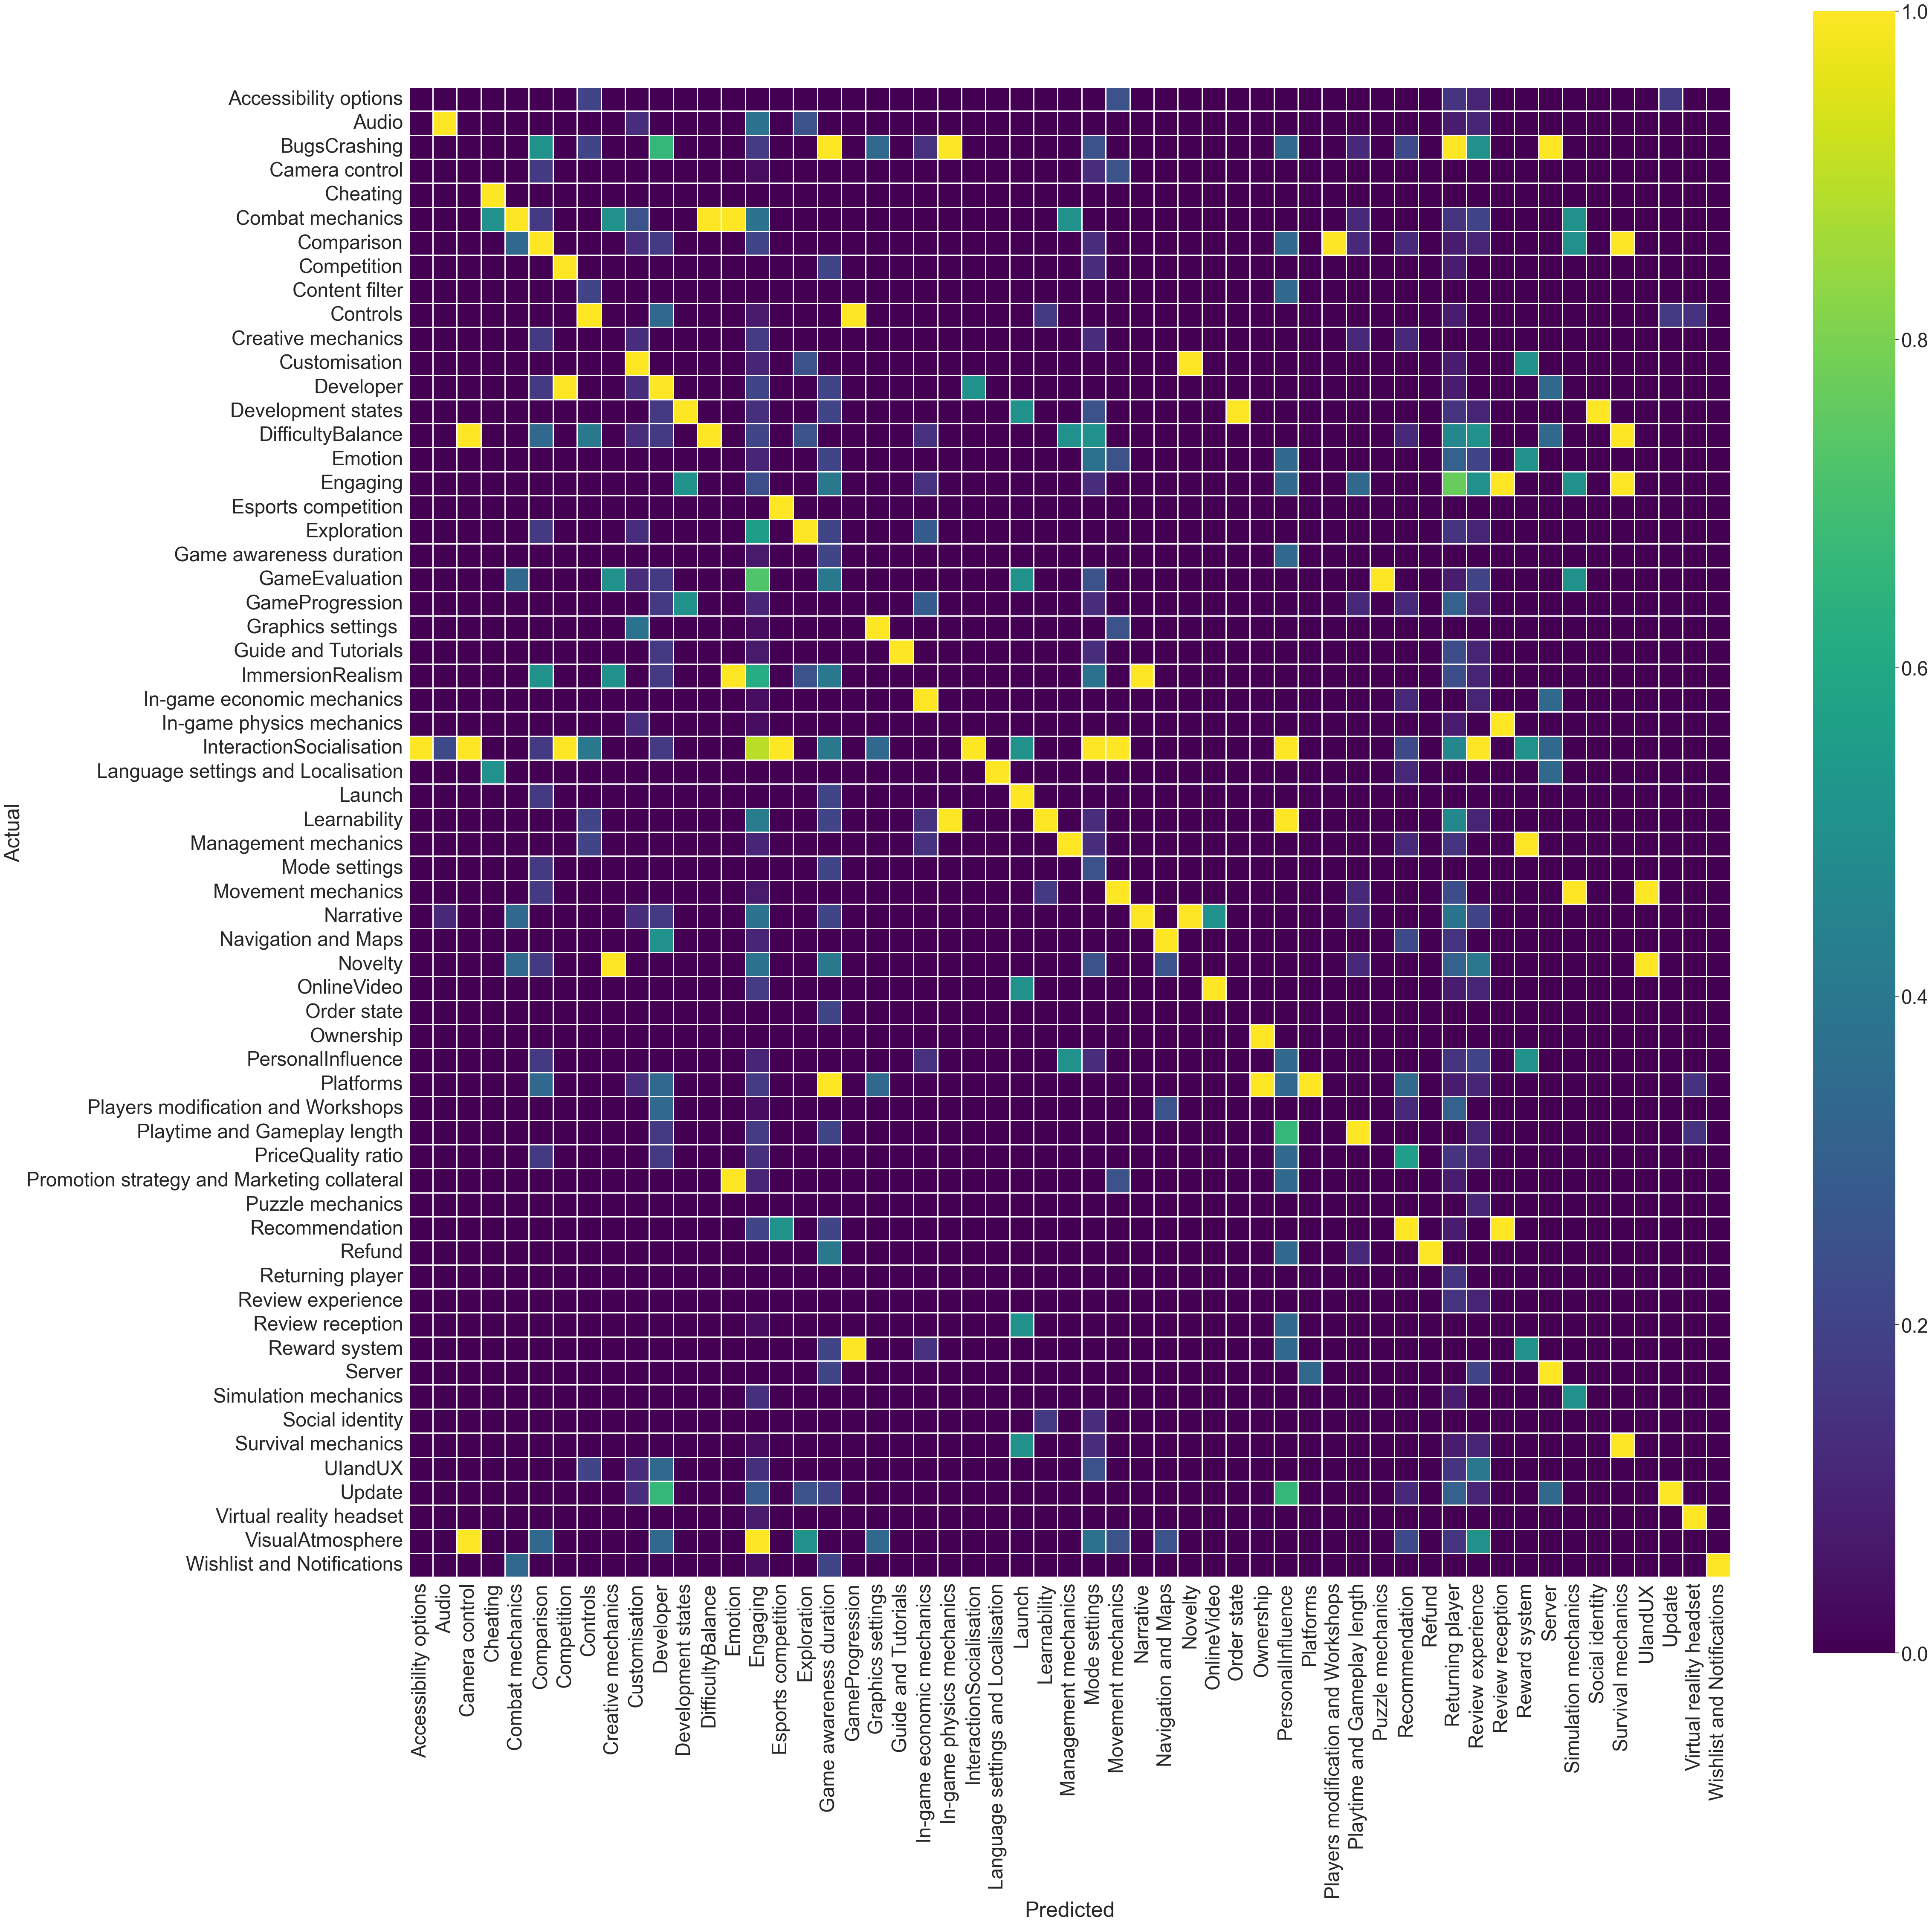

In [29]:
plt.figure(figsize = (50,50))

sn.set(font_scale=3) # for label size
sn.heatmap(df_confusion,  annot_kws={"size": 22}, cmap="viridis", fmt=".2f", square=True, linewidths=1, linecolor = "white")

plt.show()